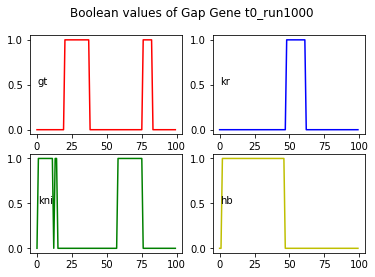

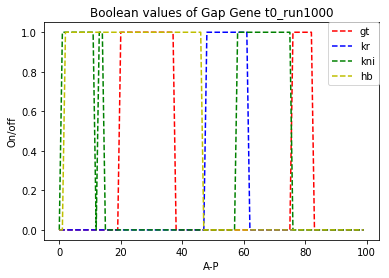

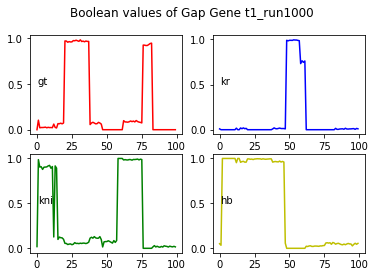

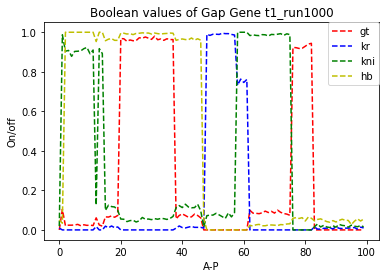

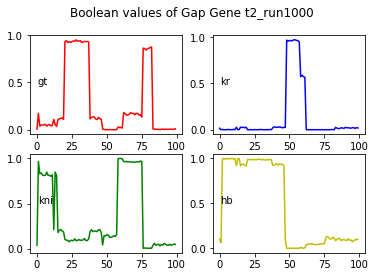

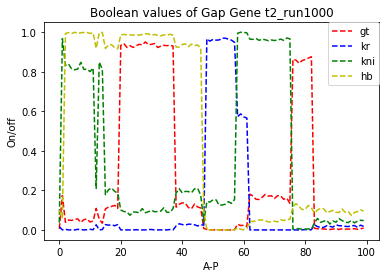

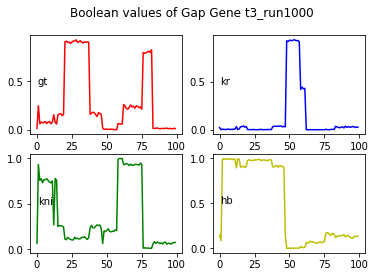

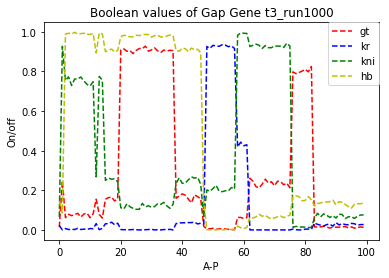

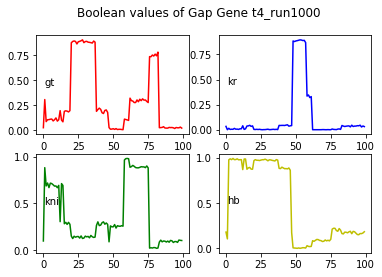

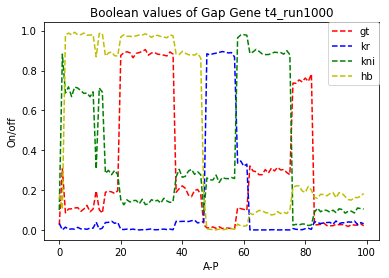

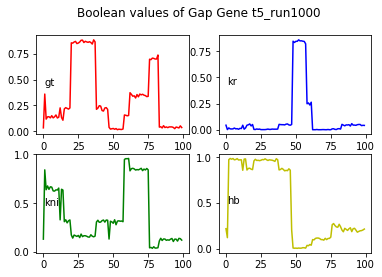

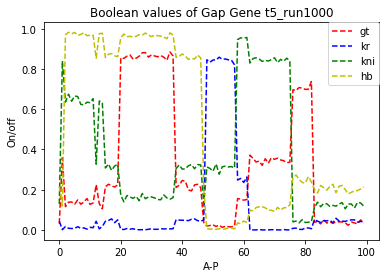

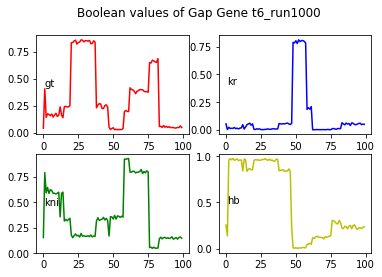

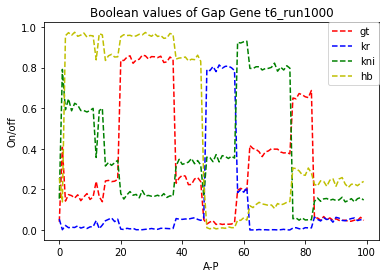

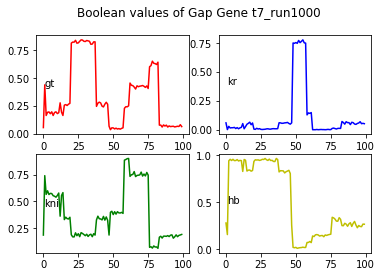

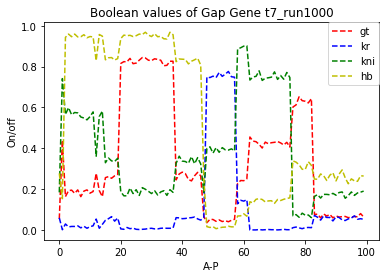

In [2]:
# an prototype model for the gap gene network in drosophila 
# # Ver.4.0 : Implement transitional Probability to update the Boolean values of the simulation
#                data length: 20 strips per timeframe
# 
#                Author : Jianhong Chen
#                Date: 4/18/2018
####################################################################################################

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
class DataHandle:
    """ To read in data for the file, plot data into different plots for virtulization"""
    
    def __init__(self):
        """ create global variables"""
        
    def dataRead(self, filename):
        """ Read the data(need to contain no header) into a dataframe. Label the column names accordingly."""
        gene = pd.read_csv(filename, sep = " ", header = None)
        gene.columns = ['NucleusNumber' , 'APCoord' , 'DVCoord' , 'eve', 'cad', 'bcd'] # columns labeling
        return(gene)
    
    def dataReadGt(self, filename):
        """ Read the data(need to contain no header) into a dataframe. Label the column names accordingly."""
        gene = pd.read_csv(filename, sep = " ", header = None)
        gene.columns = ['NucleusNumber' , 'APCoord' , 'DVCoord' , 'eve', 'kni', 'Gt'] # columns labeling
        return(gene)
    
    def dataReadHb(self, filename):
        """ Read the data(need to contain no header) into a dataframe. Label the column names accordingly."""
        gene = pd.read_csv(filename, sep = " ", header = None)
        gene.columns = ['NucleusNumber' , 'APCoord' , 'DVCoord' , 'eve', 'kr', 'hb'] # columns labeling
        return(gene)
    
    def dataStrips(self, data, n):
        """ divide the data into vertical strips, within each strip the average is taken to represent the rest of the data"""
        dataStrip = []
        for i in range(0, 100, n): 
            df1 = data[data.APCoord > i] # initiate with start point of the data positon
            df2 = df1[df1.APCoord < i + n] # df2 set the right boundary of df1 which generate the strip
            dataStrip.append(np.mean(df2.bcd)) # calculate the mean value for each strip
        return(dataStrip)
    
    def dataStripsCad(self, data, n): # same function but for cad
        """ divide the data into vertical strips, within each strip the average is taken to represent the rest of the data"""
        dataStrip = []
        for i in range(0, 100, n): 
            df1 = data[data.APCoord > i] # initiate with start point of the data positon
            df2 = df1[df1.APCoord < i + n] # df2 set the right boundary of df1 which generate the strip
            dataStrip.append(np.mean(df2.cad)) # calculate the mean value for each strip
        return(dataStrip)
            
        
    def dataStripsGt(self, data, n): # same function but for cad
        """ divide the data into vertical strips, within each strip the average is taken to represent the rest of the data"""
        dataStrip = []
        for i in range(0, 100, n): 
            df1 = data[data.APCoord > i] # initiate with start point of the data positon
            df2 = df1[df1.APCoord < i + n] # df2 set the right boundary of df1 which generate the strip
            dataStrip.append(np.mean(df2.Gt)) # calculate the mean value for each strip
        return(dataStrip)
    
    
    def dataStripsKr(self, data, n): # same function but for cad
        """ divide the data into vertical strips, within each strip the average is taken to represent the rest of the data"""
        dataStrip = []
        for i in range(0, 100, n): 
            df1 = data[data.APCoord > i] # initiate with start point of the data positon
            df2 = df1[df1.APCoord < i + n] # df2 set the right boundary of df1 which generate the strip
            dataStrip.append(np.mean(df2.kr)) # calculate the mean value for each strip
        return(dataStrip)
    
    
    def dataStripsKni(self, data, n): # same function but for cad
        """ divide the data into vertical strips, within each strip the average is taken to represent the rest of the data"""
        dataStrip = []
        for i in range(0, 100, n): 
            df1 = data[data.APCoord > i] # initiate with start point of the data positon
            df2 = df1[df1.APCoord < i + n] # df2 set the right boundary of df1 which generate the strip
            dataStrip.append(np.mean(df2.kni)) # calculate the mean value for each strip
        return(dataStrip)
    
    def dataStripsHb(self, data, n): # same function but for cad
        """ divide the data into vertical strips, within each strip the average is taken to represent the rest of the data"""
        dataStrip = []
        for i in range(0, 100, n): 
            df1 = data[data.APCoord > i] # initiate with start point of the data positon
            df2 = df1[df1.APCoord < i + n] # df2 set the right boundary of df1 which generate the strip
            dataStrip.append(np.mean(df2.hb)) # calculate the mean value for each strip
        return(dataStrip)
    
    def dataPlot(self, a, b, c, d, timestep, run = 1):
        """plot input data into two sets of plots."""
        gtplot, krplot, kniplot, hbplot = a, b, c, d
        xplot = range(0, 100, 1)
       
        plt.figure(1)
        plt.subplot(221)
        plt.suptitle("Boolean values of Gap Gene t{0}_run{1}".format(timestep, run))
        plt.plot(xplot,gtplot,'r-', markersize = 1) # "ro" plot pattern: r = red color, o = dot, - = line, -- = dotted line
        plt.text(0.5, 0.5*max(a), 'gt')
        
        plt.subplot(222)
        plt.plot(xplot, krplot, "b-", markersize = 1)
        plt.text(0.5, 0.5 * max(b), 'kr')
        
        plt.subplot(223)
        plt.plot(xplot, kniplot, 'g-', markersize = 1)
        plt.text(0.5, 0.5 * max(c), 'kni')
    
        plt.subplot(224)
        plt.plot(xplot, hbplot, 'y-', markersize = 1)
        plt.text(0.5, 0.5 * max(d), 'hb')
        plt.savefig("t{0}_run{1}_separate.jpg".format(timestep, run))  # saving the image into jpeg format
        plt.show()
    
        plt.figure(2)
        plt.plot(xplot, gtplot, 'r--', label = "gt", markersize = 1)
        plt.plot(xplot, krplot, 'b--', label = "kr" , markersize = 1)
        plt.plot(xplot, kniplot, 'g--', label = "kni", markersize = 1)
        plt.plot(xplot, hbplot, 'y--', label= "hb", markersize = 1)
        plt.title("Boolean values of Gap Gene t{0}_run{1}".format(timestep, run))
        #plt.title("Probability of the Four Gap Genes t{0}_run{1}".format(timestep, run))
        plt.xlabel('A-P')
        plt.ylabel('On/off')
        plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
        plt.savefig("t{0}_run{1}_compact.jpg".format(timestep, run))  # saving the image into jpeg format 
        plt.show()
        
#     def dataExport(self, file, filename):
#         "Export inputed files into text files"
#         with open(filename) as f:
#             f.write(file)
#         f.close()

####################################################################################
#import DataHandle as dh
import numpy as np
from random import random
import os
import csv
class DrosoGapModel:
    """The simulation of the drosophila gap genes network"""
    def __init__(self, bcd, cad, kvalue, timeStep):
        """ Global variables setup"""
        self.bcd = bcd
        self.cad = cad
        self.k = kvalue
        self.n = 2
        self.t = timeStep
        self.gapGeneTable = { # all 16 gene states for the four gap genes where reading order is (gt, kr, kni, hb)
             '0000' : '1', '1000' : '2', '0100' : '3', '0010' : '4',
             '0001' : '5', '1100' : '6', '1010' : '7', '1001' : '8',
             '0110' : '9', '0101' : '10', '0011' : '11', '1110' : '12',
             '1011' : '13', '1101' : '14', '0111' : '15', '1111' : '16'
         } 
        # swap the values & keys item of previous table
        self.gapGeneTable_complement = dict((v,k) for k, v in self.gapGeneTable.items()) 
       
        
    def activator(self, x, k):
        """ probability function for activating the gene"""
        Pa = ((x/k)**self.n / (1 + (x/k)**self.n))
        return(Pa)
        
    def repressor(self, x, weakParameter):
        """ probability function for repressing the gene"""
        Pr = (1 / (1 + (x)**weakParameter)) # the weakParameter controls the strength of the repressive function for the 
                             # weak overlapping interactions. 0 is the strongest effect and effect diminishes as it grows large
        return(Pr)
    
    def repressorH(self, x, k):
        """ probability function for repressing the gene"""
        Pr = (1 / (1 + (x/k)**self.n))
        return(Pr)
   
    def initGeneProb(self):
        """ Calculate the initial probaility for the four gap genes from the maternal activation"""

        Pbcd = [self.activator(i, self.k) for i in self.bcd] # calculate the probabilities of the maternal gene bcd from raw data
        Pcad = [self.activator(i, self.k) for i in self.cad]
        PbcdR = [self.repressorH(i, 100) for i in self.bcd]
        PcadR =[self.repressorH(i, 100) for i in self.cad]
        
        
        PgtI = [Pbcd[i] if Pbcd[i] > Pcad[i] else Pcad[i] for i in range(self.xlen)]
        # gt and hb are activated by both bcd and cad. So it retains the highest probability from either maternal gene.
        PkrI = Pbcd
        PkniI = [PbcdR[i] if PbcdR[i] < PcadR[i] else PcadR[i] for i in range(self.xlen)]
        PhbI = PcadR
       
        #return(PbcdR, PcadR)
        return( PgtI, PkrI, PkniI, PhbI)
        
    def geneOnOff(self, Pgt, Pkr, Pkni, Phb):
        """ Calculate the boolean value of the four gap gene based on the input probabilities.
            Example: if Pgt = 0.6, random() will generate a random number(non integer) and have 60% less than 0.6.
                        thus, random() < Pgt  is the right implementation for the probability.
        """
        xlen = len(Pgt)
        gt = [1  if random() < Pgt[i] else 0 for i in range(xlen)]  
        kr = [1  if random() < Pkr[i] else 0 for i in range(xlen)]
        kni = [ 1 if random() < Pkni[i] else 0 for i in range(xlen)]
        hb = [ 1 if random() < Phb[i] else 0 for i in range(xlen)]
        
        return(gt, kr, kni, hb)
    
    def geneOnOff2(self, Pgt, Pkr, Pkni, Phb):
        """ Calculate the boolean value of the four gap gene based on the threshold values of each repective gene."""
        # 10%strip data threshold: gt = 35.3747; kr = 38.4963; kni = 33.0458; hb = 69.0893
        # whole data threshold: gt = 47.4987; kr = 54.7634; kni = 51.7834; hb = 73.5851
        # whole data Round 2 embryo: gt= 56.8317; kr =54.2713; kni=55.5811; hb=68.7128
        # whole data Round 3 embryo: gt = 53.5890; kr = 47.9943; kni = 58.4083; hb = 71.3647
        
        xlen = len(Pgt)
        gt = [1  if Pgt[i] >= 53.5890 else 0 for i in range(xlen)]  # the number here is the calculated threshold
        kr = [1  if Pkr[i] >= 47.9943 else 0 for i in range(xlen)]
        kni = [ 1 if Pkni[i] >= 58.4083 else 0 for i in range(xlen)]
        hb = [ 1 if Phb[i] >= 71.3647 else 0 for i in range(xlen)]
        
        return(gt, kr, kni, hb)
    
    def vectorize(self, gtB, krB, kniB, hbB):
        """ combine the four gene data into a matrix for better organization and simplifing the calculation later"""
        length = len(gtB)
        stateM_string = [str(gtB[i]) + str(krB[i]) + str(kniB[i]) + str(hbB[i]) for i in range(length) ]
        # notice: each element of stateM is string becasue string data type is needed for concatenation!
        return(stateM_string)
        
    def simUpdateFun(self, initial_state):
        """Update the overall transitional state and store it during each timeframe """
        xlen = len(initial_state)
        stateCodeAll = list(1 for i in range(self.t + 1))
        stateCodeAll[0] = [self.gapGeneTable.get(initial_state[i]) for i in range(xlen)]
        stateReverse = list(1 for i in range(self.t+1))
        stateReverse[0] = initial_state
        timeframe = 0
        gt_all = list()
        kr_all = list()
        kni_all = list()
        hb_all = list()
        
        while timeframe < self.t: # iterate throught all transitional state temporally
            # temporary list for storing the updated results
            temp = list() 
            x_counter = 0 # a counter to determine the position of each transitional state
            for i in stateCodeAll[timeframe]: # iterate through all transitional state spatially
                if i == '1': # iterate through the 16 possible states
                    # then implement the calculated transitional probabilities
                    rd = random()
                    temp.append( '1' if rd >= 0 and rd <= 0.9208 else '3' if rd > 0.9208 and rd <= 0.9307 
                                else '4' if rd > 0.9307 and rd <= 0.9505 else '5')

                elif i == '2':
                    rd= random()
                    temp.append('1' if rd >= 0 and rd <= 0.0741 else '2' if rd > 0.0741 and rd <= 0.9445 else '8')

                elif i == '3':
                    rd = random()
                    temp.append('3' if rd >= 0 and rd <= 0.9271 else '4' if rd > 0.9271 and rd <= 0.9375 else '9')

                elif i =='4':
                    rd = random()
                    temp.append('2' if rd >= 0 and rd <= 0.0125 else '4' if rd > 0.0125 and rd <= 0.9
                               else '7' if rd >0.9 and rd <= 0.975 else '11')

                elif i == '5':
                    rd = random()
                    temp.append('1' if rd >= 0 and rd <= 0.0389 else '5' if rd > 0.0389 and rd <= 0.8051 
                               else '8' if rd > 0.8051 and rd <= 0.87 else '10' if rd > 0.87 and rd <= 0.883
                               else '11')

                elif i =='7':
                    rd = random()
                    temp.append('2' if rd >= 0 and rd <= 0.1538 else '7')

                elif i =='8':
                    rd = random()
                    temp.append('1' if rd >= 0 and rd <= 0.0069 else '5' if rd > 0.0069 and rd <= 0.0347 
                               else '8' if rd >0.0347 and rd <=0.9444 else '13')

                elif i == '9':
                    rd = random()
                    temp.append('4' if rd >= 0 and rd <= 0.24 else '9')

                elif i == '10':
                    rd = random()
                    temp.append('3' if rd >=0 and rd <= 0.3 else '10')

                elif i == '11':
                    rd = random()
                    temp.append('5' if rd >= 0 and rd <= 0.1034 
                               else '11' if rd >0.1034 and rd <= 0.977 else '13')

                elif i == '13':
                    rd = random()
                    temp.append('8' if rd >= 0 and rd <= 0.25 else '13')

                elif i =='14':
                    rdd = random()
                    temp.append('10' if rd >= 0 and rd <= 0.2273 else '13')

            stateCodeAll[timeframe+1] = temp # store the data of each iteration 

            # now convert the state code back to actual gap genes Boolean value:
            stateReverse[timeframe + 1] = [self.gapGeneTable_complement.get(i) for i in temp]

            # ecxtracting the information from the overall state back to indiviual gap gene (Boolean Value)
            gt_temp = [list(map(int, i))[0] for i in stateReverse[timeframe]] # 'map' function split the string into integer
            kr_temp = [list(map(int, i))[1] for i in stateReverse[timeframe]]
            kni_temp = [list(map(int, i))[2] for i in stateReverse[timeframe]]
            hb_temp = [list(map(int, i))[3] for i in stateReverse[timeframe]]

            # plotting the results into figure 
#                 data = DataHandle()
#                 data.dataPlot(gt_temp, kr_temp, kni_temp, hb_temp, timeframe, run)

            timeframe += 1 # keep accumalting timeframe to ensure the while loop will end after the input number of iteration
            
            gt_all.append(gt_temp)
            kr_all.append(kr_temp)
            kni_all.append(kni_temp)
            hb_all.append(hb_temp)
        return(gt_all, kr_all, kni_all, hb_all)
    
    def simAverage(self, n):
        """ Average the results of a series runs of the simulation and verify the stochastic feature of the simulation"""
        
        data = DataHandle()
        # first need to calculate the initial state to initiate the simulation:
        # precusor, maternal genes initiation.
        path = "C:/Users/Jianhong/Desktop/UCSC Rotaion(Marcella)/data/ab_cycle14A_temporal1/txt/byEmbryos"
        os.chdir(path)
        ab11= data.dataRead('ab11Python.txt')
        bcd = data.dataStrips(ab11, 5)
        cad = data.dataStripsCad(ab11, 5)
        sim = DrosoGapModel(bcd, cad, 100, 8)
        # initial conditions: directly importing the gap gene data at time 1 Rround 3
        dir1 = "C:/Users/Jianhong/Desktop/UCSC Rotaion(Marcella)/data/gt_kni14At1-8_w_R3/txt/byEmbryos_Python" # gt & kni
        #C:\Users\Jianhong\Desktop\UCSC Rotaion(Marcella)\data\gt_kni14At1-8_w_R3\txt\byEmbryos_Python
        os.chdir(dir1)
        gt_kni = data.dataReadGt('t1_kf4.txt')
        gt = data.dataStripsGt(gt_kni, 1)
        kni = data.dataStripsKni(gt_kni, 1)

        dir2 = "C:/Users/Jianhong/Desktop/UCSC Rotaion(Marcella)/data/kr_hb14At1-8_w_R3/txt/byEmbryos_Python" # kr & hb
        #C:\Users\Jianhong\Desktop\UCSC Rotaion(Marcella)\data\kr_hb14At1-8_w_R3\txt\byEmbryos_Python
        os.chdir(dir2)
        kr_hb = data.dataReadHb('t1_kf8.txt')
        kr = data.dataStripsKr(kr_hb, 1)
        hb = data.dataStripsHb(kr_hb, 1)

        gtB2, krB2, kniB2, hbB2 = sim.geneOnOff2(gt, kr, kni, hb)
        stateI2 = sim.vectorize(gtB2, krB2, kniB2, hbB2)
        
        
        # method to average all the run for each gap gene in term of Boolean value
        gtAll = list() # 3 nested lists:outer most list = trial-run; intermidate list = timeframe; inner most list = positioning.
        krAll = list()
        kniAll = list()
        hbAll = list()
        
        gt_avg = list()
        kr_avg = list()
        kni_avg = list()
        hb_avg = list()
        
        output_path = "C:/Users/Jianhong/Desktop/UCSC Rotaion(Marcella)/data/kr_hb14At1-8_w_R3/txt/Python_Output"

        # first simulate the data by n specific times and store them into a 3 nested list
        for run in range(n):
            gt1, kr1, kni1, hb1 = self.simUpdateFun(stateI2)
            gtAll.append(gt1)
            krAll.append(kr1)
            kniAll.append(kni1)
            hbAll.append(hb1)
        # second sum up each position with respect to its timeframe
        for t in range(8):
            gt_sum = list(0 for x in range(100))
            kr_sum = list(0 for x in range(100))
            kni_sum = list(0 for x in range(100))
            hb_sum = list(0 for x in range(100))
            for run in range(n):
                gt_sum = np.add(gt_sum, gtAll[run][t]) # numpy package provide add function to add list element-wise
                kr_sum = np.add(kr_sum, krAll[run][t])
                kni_sum = np.add(kni_sum, kniAll[run][t])
                hb_sum = np.add(hb_sum, hbAll[run][t])
            gt_avg.append(np.divide(gt_sum, n)) # numpy package provide divide function to divide list element-wise
            kr_avg.append(np.divide(kr_sum, n))
            kni_avg.append(np.divide(kni_sum, n))
            hb_avg.append(np.divide(hb_sum, n))
            
        # plot the averaged results:     
            data.dataPlot(gt_avg[t], kr_avg[t], kni_avg[t], hb_avg[t], t, n)
        
        #export the data into text files     
            os.chdir(output_path)
            f1 = open("gt_avg_t{0}.txt".format(t), "w")
            for val in gt_avg[t]:
                f1.write(str(val)+"\n")
            f1.close()
            
            f2 = open("kr_avg_t{0}.txt".format(t), "w")
            for val in kr_avg[t]:
                f2.write(str(val)+"\n")
            f2.close()
            
            f3 = open("kni_avg_t{0}.txt".format(t), "w")
            for val in kni_avg[t]:
                f3.write(str(val)+"\n")
            f3.close()
            
            f4 = open("hb_avg_t{0}.txt".format(t), "w")
            for val in hb_avg[t]:
                f4.write(str(val)+"\n")
            f4.close()
            
        

        
#######################################################################################       
import os
import numpy as np
def main():
    path = "C:/Users/Jianhong/Desktop/UCSC Rotaion(Marcella)/data/ab_cycle14A_temporal1/txt/byEmbryos"
    os.chdir(path)
    data = DataHandle()
    ab11= data.dataRead('ab11Python.txt')
    bcd = data.dataStrips(ab11, 5)
    cad = data.dataStripsCad(ab11, 5)
    sim = DrosoGapModel(bcd, cad, 100, 8)  
#     # second initial conditions: directly importing the gap gene data at time 1 Rround 3
#     dir1 = "C:/Users/Jianhong/Desktop/UCSC Rotaion(Marcella)/data/gt_kni14At1-8_w_R3/txt/byEmbryos_Python" # gt & kni
#     #C:\Users\Jianhong\Desktop\UCSC Rotaion(Marcella)\data\gt_kni14At1-8_w_R3\txt\byEmbryos_Python
#     os.chdir(dir1)
#     gt_kni = data.dataReadGt('t1_kf4.txt')
#     gt = data.dataStripsGt(gt_kni, 1)
#     kni = data.dataStripsKni(gt_kni, 1)
    
#     dir2 = "C:/Users/Jianhong/Desktop/UCSC Rotaion(Marcella)/data/kr_hb14At1-8_w_R3/txt/byEmbryos_Python" # kr & hb
#     #C:\Users\Jianhong\Desktop\UCSC Rotaion(Marcella)\data\kr_hb14At1-8_w_R3\txt\byEmbryos_Python
#     os.chdir(dir2)
#     kr_hb = data.dataReadHb('t1_kf8.txt')
#     kr = data.dataStripsKr(kr_hb, 1)
#     hb = data.dataStripsHb(kr_hb, 1)
    
#     gtB2, krB2, kniB2, hbB2 = sim.geneOnOff2(gt, kr, kni, hb)
#     stateI2 = sim.vectorize(gtB2, krB2, kniB2, hbB2)
    sim.simAverage(1000)
    
    
    
    
main()

In [1]:
import numpy as np
import csv